In [5]:
import numpy as np
import matplotlib.pyplot as plt

In [36]:
duration = 10.0
sampling_rate = 10
noise_level = 0.1

In [52]:
t = np.linspace(0, duration, int(sampling_rate * duration), endpoint = False)

# Chatgpt'd
signal = (
    np.piecewise(
        t,
        [t < 2, (t >= 2) & (t < 4), (t >= 4) & (t < 6), (t >= 6) & (t < 8), t >= 8],
        [
            lambda t: 0.5 * t,  # Ascend gradually
            lambda t: 1 + 0.1 * np.sin(3 * np.pi * t),  # Hover with oscillations
            lambda t: 2 - 0.2 * t,  # Gradual descent
            lambda t: -0.5 + 0.1 * t + 0.2 * np.sin(2 * np.pi * t),  # Random motion
            lambda t: -t + 10,  # Descend sharply
        ],
    )
)

noisy_signal = signal + np.random.normal(0, noise_level, signal.shape)

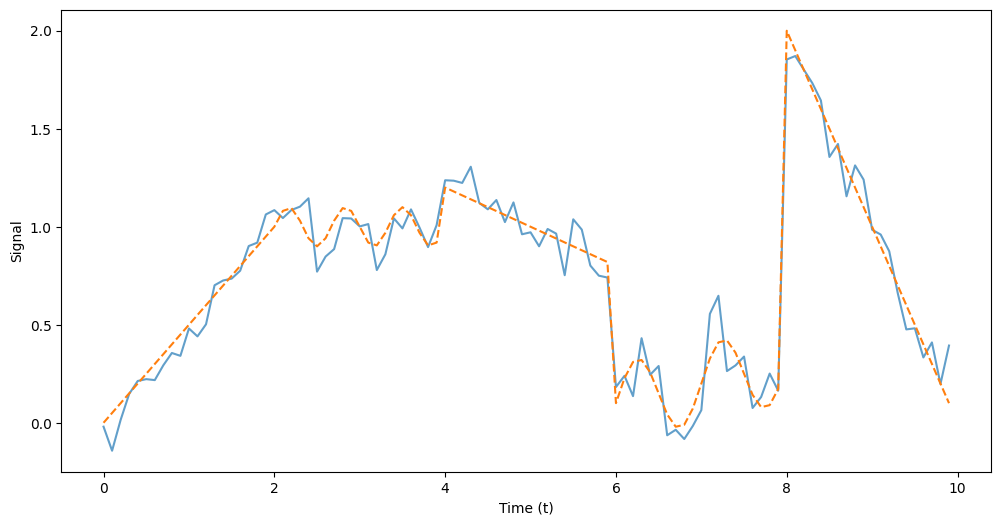

In [53]:
plt.figure(figsize=(12,6))
plt.plot(t, noisy_signal, alpha=0.7)
plt.plot(t, signal, linestyle="--")
plt.xlabel("Time (t)")
plt.ylabel("Signal")

plt.show()

In [54]:
def average_filter(previous_average, new_sample, k):
    alpha = (k-1)/k
    return (alpha) * previous_average + (1 - alpha) * new_sample

filtered_signal = []

previous_avg = 0
for x in range(t.shape[0]):
    new_avg = average_filter(previous_avg, noisy_signal[x], x+1)
    filtered_signal.append(new_avg)
    previous_avg = new_avg

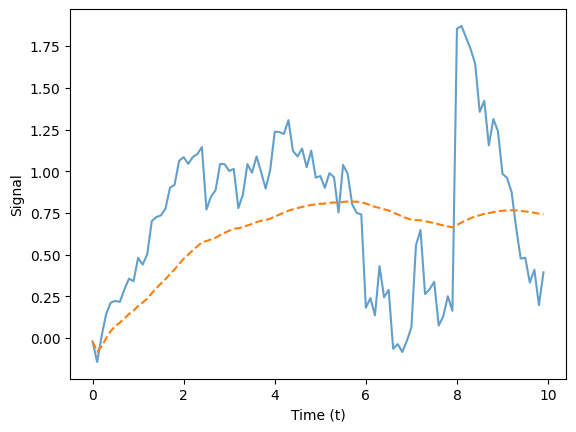

In [55]:
plt.plot(t, noisy_signal, alpha=0.7)
plt.plot(t, filtered_signal, linestyle="--")
plt.xlabel("Time (t)")
plt.ylabel("Signal")

plt.show()

In [63]:
def moving_average_filter(previous_average, kth_sample, k_minus_nth_sample, window_size):
    return previous_average + (kth_sample - k_minus_nth_sample) / window_size

filtered_signal = []

window_size = 4
prev_avg = 0
for x in range(t.shape[0]):
    if x < window_size:
        filtered_signal.append(noisy_signal[x])
        prev_avg = noisy_signal[x]
    else:
        new_avg = moving_average_filter(prev_avg, noisy_signal[x], noisy_signal[x-window_size], window_size)
        filtered_signal.append(new_avg)
        prev_avg = new_avg

print(filtered_signal)

[np.float64(-0.019922117029358137), np.float64(-0.14262708186527961), np.float64(0.014555961825777827), np.float64(0.1469307757757469), np.float64(0.20518964641003273), np.float64(0.2964782901938542), np.float64(0.3472430079615171), np.float64(0.38383908190856464), np.float64(0.4195616980783209), np.float64(0.44927712401642944), np.float64(0.5151076061165609), np.float64(0.5519467596636675), np.float64(0.5885740215174889), np.float64(0.6786023371380101), np.float64(0.7398236439884734), np.float64(0.8135222463791778), np.float64(0.88185431320513), np.float64(0.9318676487028061), np.float64(0.9801166491499684), np.float64(1.061911376305896), np.float64(1.139139021589534), np.float64(1.1748439605922387), np.float64(1.2164958945766442), np.float64(1.2264688725653121), np.float64(1.2415662426325293), np.float64(1.1732336571320012), np.float64(1.1138316249872102), np.float64(1.0596903803959095), np.float64(1.0343898878835596), np.float64(1.102164803063654), np.float64(1.140630182229097), np.

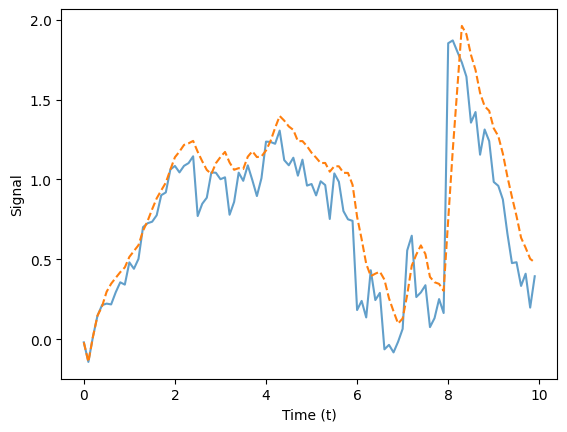

In [64]:
plt.plot(t, noisy_signal, alpha=0.7)
#plt.plot(t, signal)
plt.plot(t, filtered_signal, linestyle="--")
plt.xlabel("Time (t)")
plt.ylabel("Signal")

plt.show()